# LECTURE 5: Logistic Regression

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
  
heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
df = pd.DataFrame(heart_disease.data.original, columns=heart_disease.headers)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


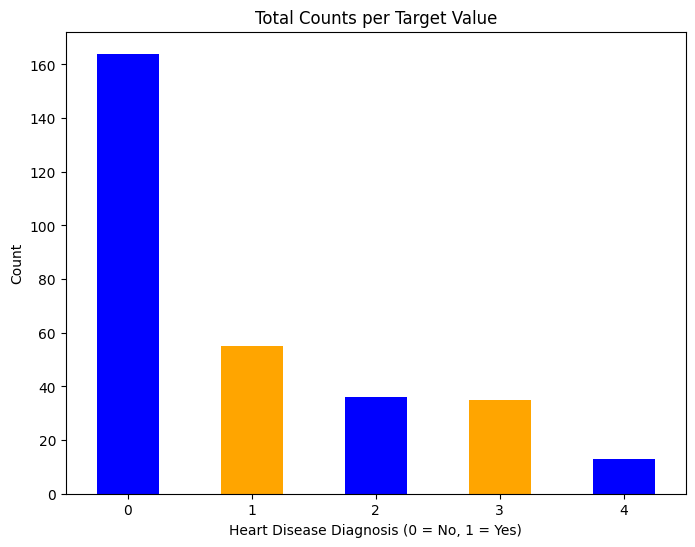

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['num'].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Heart Disease Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Total Counts per Target Value')
plt.xticks(rotation=0)
plt.show()

C:\Users\Kiefer Gallego\AppData\Local\Temp\ipykernel_11300\3870836845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kiefer Gallego\AppData\Local\Programs\

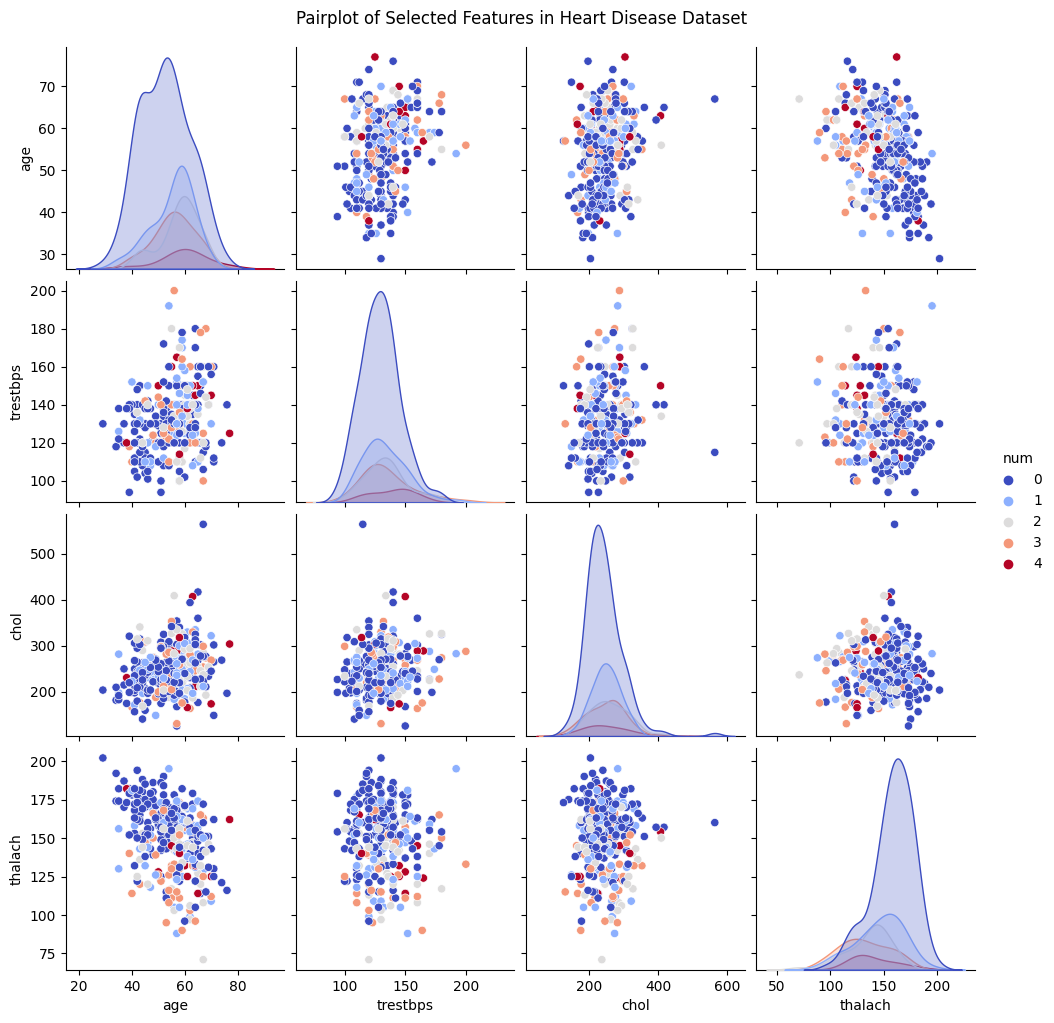

In [7]:
import seaborn as sns

df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Selecting relevant columns for the pairplot
columns_of_interest = ['age', 'trestbps', 'chol', 'thalach', 'num']
df_selected = df[columns_of_interest]

# Drop rows with NaN values (if any)
df_selected.dropna(inplace=True)

# Creating a pairplot
sns.pairplot(df_selected, hue='num', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features in Heart Disease Dataset', y=1.02)
plt.show()

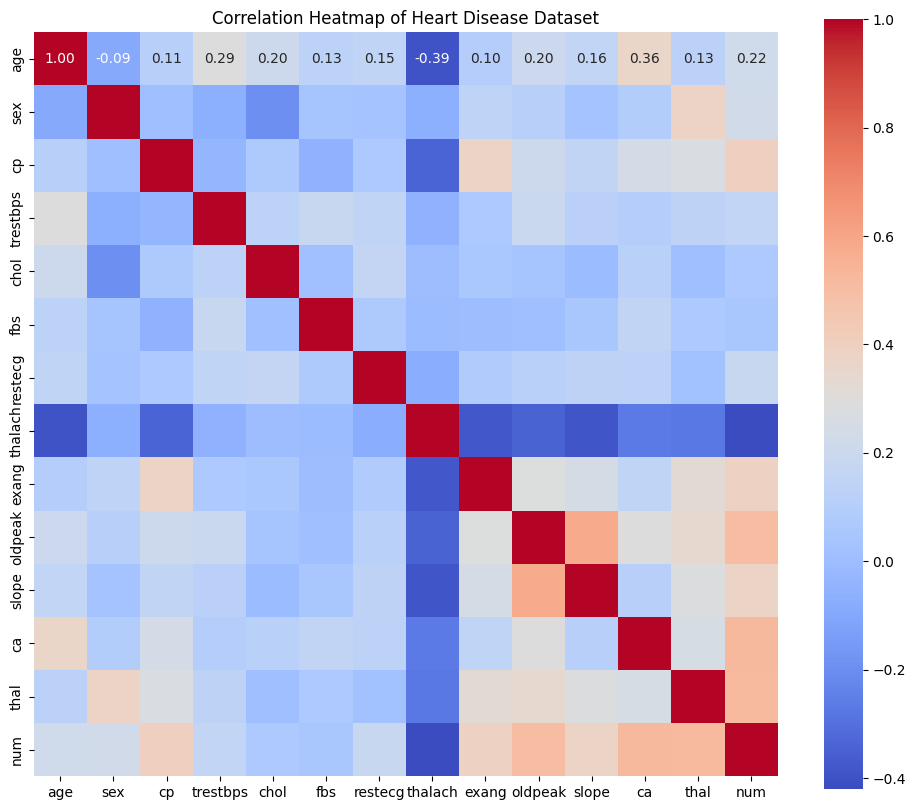

In [8]:
# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['num'])  # Features
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegressionCV

# Create Logistic Regression model with cross-validation
lr_model_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=1000)

# Fit the model on the training data
lr_model_cv.fit(X_train_scaled, y_train)

# Print the best C value found
print("Optimal C value found using LogisticRegressionCV:", lr_model_cv.C_[0])


Best C value: 0.3593813663804626


Model Coefficients:
age: -0.06055592710277505
sex: -0.42308569003907937
cp: -0.6423804798198651
trestbps: -0.3675527960736651
chol: -0.13893552963689526
fbs: 0.20374277093697601
restecg: -0.2686309224051909
thalach: 0.4373801064506037
exang: -0.24173345410176067
oldpeak: -0.31842948444982605
slope: -0.3077035917989073
ca: -0.8852137623776343
thal: -0.6042592090062099


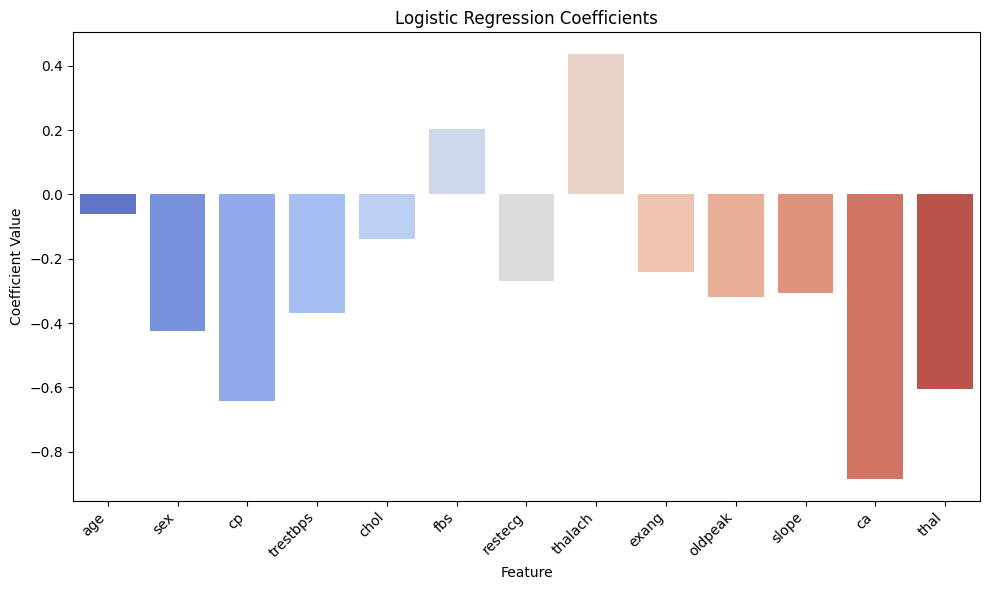

In [19]:

coefficients = lr_model_cv.coef_[0]

print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coefficients, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


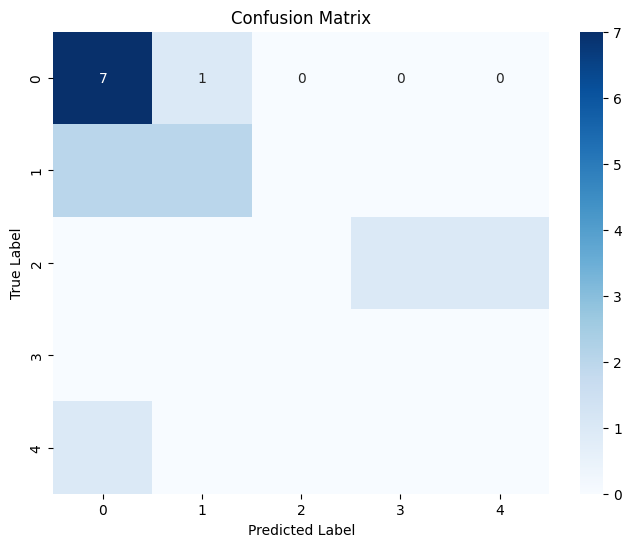

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


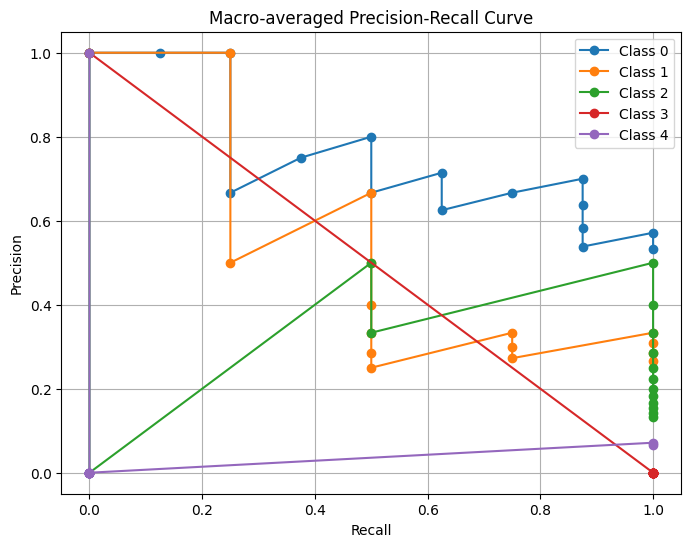

In [27]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall for each class individually
precisions = dict()
recalls = dict()
thresholds = dict()
for i in range(len(lr_model_cv.classes_)):
    precisions[i], recalls[i], thresholds[i] = precision_recall_curve(y_test == i, lr_model_cv.predict_proba(X_test_scaled)[:, i])

# Plot Macro-averaged Precision-Recall curve
plt.figure(figsize=(8, 6))
for i in range(len(lr_model_cv.classes_)):
    plt.plot(recalls[i], precisions[i], marker='o', label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-averaged Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


C:\Users\Kiefer Gallego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


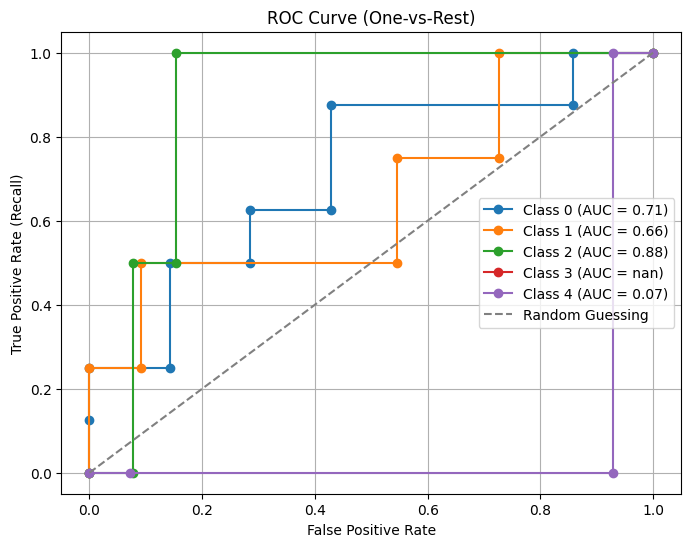

In [29]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for each class individually
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lr_model_cv.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, lr_model_cv.predict_proba(X_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(lr_model_cv.classes_)):
    plt.plot(fpr[i], tpr[i], marker='o', label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()
